In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

pd.set_option('display.max_rows', 500)


In [2]:
# Import all data within date range (2020-01-01 to 2020-06-30)
conv_unfil = pd.read_csv('./data/conventional_unfiltered_2020.csv')
conv_unfil["text"] = conv_unfil["title"].fillna('') + " " + conv_unfil["excerpt"].fillna('')
conv_unfil = conv_unfil[['date_time', 'text', 'entity']]
conv_unfil['date'] = pd.to_datetime(conv_unfil.date_time, format= '%Y-%m-%d %H:%M:%S')
conv_unfil['date'] = conv_unfil['date'].dt.date

cryp_unfil = pd.read_csv('./data/crypto_2020_unfiltered_updated.csv')
cryp_unfil["text"] = cryp_unfil["title"].fillna('') + " " + cryp_unfil["excerpt"].fillna('')
cryp_unfil = cryp_unfil[['date_time', 'text', 'entity']]
cryp_unfil['date'] = pd.to_datetime(cryp_unfil.date_time, format= '%d/%m/%y %H:%M')
cryp_unfil['date'] = cryp_unfil['date'].dt.date

reddit_unfil = pd.read_csv('./data/reddit_unfiltered_2020.csv')
reddit_unfil["text"] = reddit_unfil["title"].fillna('') + " " + reddit_unfil["excerpt"].fillna('')
reddit_unfil = reddit_unfil[['date_time', 'text', 'entity']]
reddit_unfil['date'] = pd.to_datetime(reddit_unfil.date_time, format= '%Y-%m-%d %H:%M:%S')
reddit_unfil['date'] = reddit_unfil['date'].dt.date

twitter_unfil = pd.read_csv('./data/twitter_unfiltered_2020.csv')
twitter_unfil = twitter_unfil.rename(columns={"date": "date_time", "tweet":"text"})
twitter_unfil = twitter_unfil[['date_time', 'text', 'entity']]
twitter_unfil['date'] = pd.to_datetime(twitter_unfil.date_time, format= '%Y-%m-%d')
twitter_unfil['date'] = twitter_unfil['date'].dt.date


all_unfil = conv_unfil.append(cryp_unfil)
all_unfil = all_unfil.append(reddit_unfil)
all_unfil = all_unfil.append(twitter_unfil)

all_unfil['entity'] = all_unfil['entity'].str.lower()


## Predicted high risk over time

Graph of hacks over time plots proportion of posts/articles predicted as high-risk relative to the total number of posts over time


In [3]:
#start_date/end_date in format: 'yyyy-mm-dd'

def perc_hack_graph(df, all_test, start_date, end_date, entity= '', vol = False):  
    # Process dataframe
    # Get datetime format for df date
    for fmt in ('%Y-%m-%d %H:%M:%S', '%d/%m/%y %H:%M', '%d/%m/%y'):
        try:
            df['date'] = pd.to_datetime(df.date_time, format=fmt)
        except ValueError:
            pass

    df['date'] = df['date'].dt.date
    df['entity'] = df['entity'].str.lower()
    
    #If there is an input in the entity, filter to retrieve only from entity    
    if entity != '':
        entity = entity.lower()
        
        #Get subset of dataframe with entity 
        df = df[df['entity'] == entity]
        tem1 = all_test[all_test['entity'] == entity]
    
    #Else if there is no entity restriction, use all the data
    else:
        tem1 = all_test
        
    
    #Group data by date and find the number of posts predicted as risky 
    df2 =  df.groupby('date').sum()
    
    #Get all date within range and fill dates with no data with 0 
    idx = pd.date_range(start_date, end_date)
    df2.index =  pd.DatetimeIndex(df2.index)
    df2 = df2.reindex(idx, fill_value=0)
        
    
    # Group data by date and find the number of posts on the date 
    tem1 =  tem1.groupby('date').count()
    
    # Get all date within range and fill dates with no data with 0 
    tem1.index = pd.DatetimeIndex(tem1.index)
    tem1 = tem1.reindex(idx, fill_value=0)
    
    # Merge  the 2 dataframes by date and calculate % risky
    df2['perc'] = df2['pred']/tem1['text'] * 100
    df2['perc'] = df2['perc'].fillna(0)

    #Print dates & percentage hack that values are exceptionally high (>95 percentile)
    
    high = df2['perc'].quantile(0.96)
    print(df2[df2['perc'] > high][['perc']])
    
    


    # Plot graph of % predicted risky over time 
    plt.figure(figsize=(15,10))
    plt.plot(df2.index, df2['perc'])
    plt.grid(True)
    plt.xlim()
    plt.xlabel('Date')
    plt.ylabel('% Predicted as high risk')
    plt.title('% Predicted as high risk over Time (' + entity + ')')
    plt.show()
    

In [4]:
def get_data_on_date(df, date, entity = ''):
    df2 = df[df['date'] == date]
    if entity != '':
        df2 = df2[df2['entity'] == entity]
    return df2

In [ ]:
#Example Usage
#data = get_data_on_date(df, datetime(2020,2,1).date())
#view = data[data['pred']==1]
#view

# Roberta test data

In [5]:
# Test data
df1 = pd.read_csv('./data/roberta/2020_roberta_reddit.csv')
df1 = df1[['date_time', 'text', 'entity', 'pred']]


df2 = pd.read_csv('./data/roberta/2020_roberta_conventional.csv')
df2 = df2[['date_time', 'text', 'entity','pred']]


df3 = pd.read_csv('./data/roberta/2020_roberta_crypto.csv')
df3 = df3[['date_time', 'text', 'entity','pred']]


df4 =  pd.read_csv('./data/roberta/2020_roberta_twitter.csv')
df4 = df4[['date_time', 'text', 'entity', 'pred']]

df = df1.append(df2)
df = df.append(df3)
df = df.append(df4)

# Process dataframe
# Get datetime format for df date
for fmt in ('%Y-%m-%d %H:%M:%S', '%d/%m/%y %H:%M', '%d/%m/%y'):
    try:
        df['date'] = pd.to_datetime(df.date_time, format=fmt)
    except ValueError:
        pass

df['date'] = df['date'].dt.date
df['entity'] = df['entity'].str.lower()

    
    
#print(len(df))
#df = df.drop_duplicates(subset=['date', 'entity', 'text'], keep='last')
#print(len(df))


In [6]:
df.head()

,date_time,text,entity,pred,date
0,2020-06-29 11:16:37,balancer just got hacked it seems https://medi...,1inch.exchange,1,2020-06-29
1,2020-06-29 10:58:19,another article.\n\nhttps://medium.com/@1inch....,1inch.exchange,0,2020-06-29
2,2020-06-18 18:39:28,revoke your permissions and contracts? honestl...,1inch.exchange,0,2020-06-18
3,2020-02-25 03:27:22,"no uniswap, no synthetix, 3 lending services -...",1inch.exchange,0,2020-02-25
4,2020-02-21 08:19:25,https://medium.com/@1inch.exchange/yes-we-hack...,1inch.exchange,0,2020-02-21


                 perc
2020-02-18  17.623762
2020-02-28   2.926829
2020-04-19  26.705202
2020-04-20   2.434457
2020-05-13  18.315789
2020-05-21  32.467532
2020-06-26   4.450758
2020-06-29  27.631579


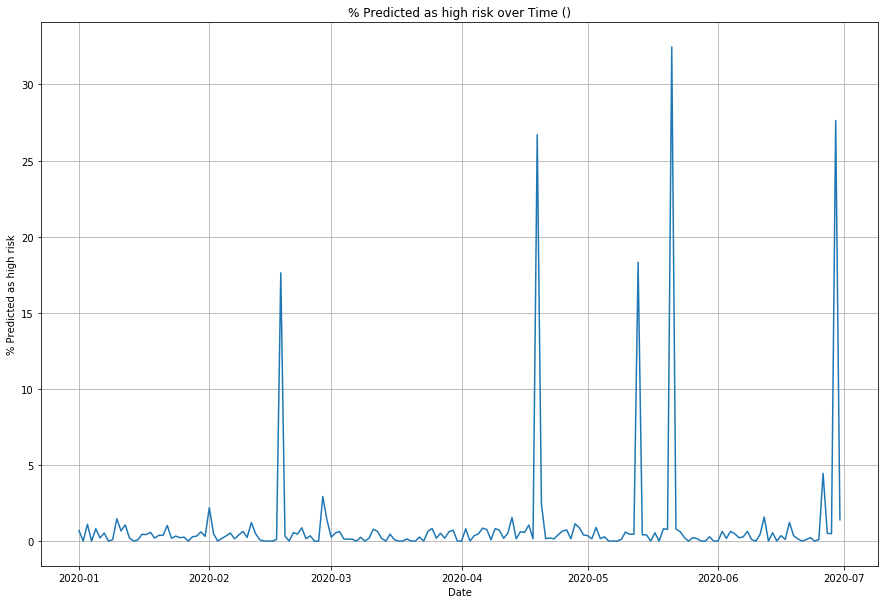

In [12]:
perc_hack_graph(df, all_unfil, '2020-01-01', '2020-06-30')


2020-02-18 - Chinese exchange Fcoin closes down, still owes users $125 million

2020-02-28 - Major Crypto Exchanges Bitfinex and OKEx Hit by Service Denial Attacks - CoinDesk

2020-04-19 - Uniswap hack

2020-04-20 - Uniswap hack (cont.)

2020-05-13 - Movement of stolen funds transferred from Upbit Hack Nov 2019 to #Binance (Spike from Twitter)

2020-05-21 -  BlockFi says the attacker was able to access and view BlockFi client information

2020-06-26 - A lot of false +ve on date from Twitter

2020-06-29 - Balancer hack

### By entity

##### Uniswap

                 perc
2020-04-19  25.000000
2020-04-20  50.000000
2020-04-22   4.545455


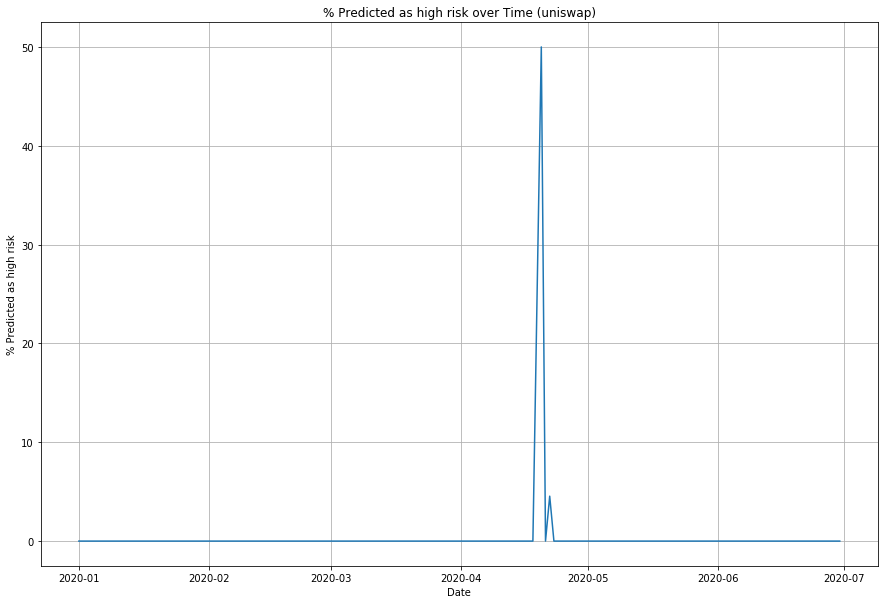

In [13]:
perc_hack_graph(df, all_unfil, '2020-01-01', '2020-06-30', 'uniswap')


2020-04-19: Uniswap hack


##### Balancer

                 perc
2020-06-27  20.000000
2020-06-29  41.509434
2020-06-30  17.948718


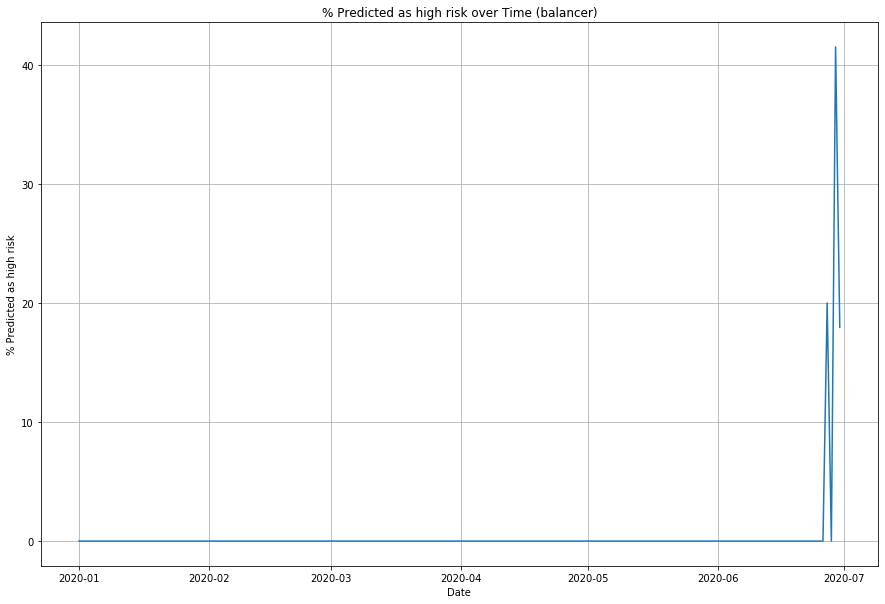

In [14]:
perc_hack_graph(df, all_unfil, '2020-01-01', '2020-06-30', 'balancer')


2020-06-27 - False +ve (due to small number of balancer data)

2020-06-29 - balancer hack


In [17]:
data = get_data_on_date(df, datetime(2020,6,29).date(), 'balancer')
view = data[data['pred']==1]
view

,date_time,text,entity,pred,date
5258,2020-06-29 23:54:16,"warned in may of attack, defi balancer multi-t...",balancer,1,2020-06-29
5259,2020-06-29 21:42:34,defi protocol balancer hacked through exploit ...,balancer,1,2020-06-29
5260,2020-06-29 21:41:21,defi protocol balancer hacked through exploit ...,balancer,1,2020-06-29
5261,2020-06-29 21:29:30,was balancer hacked internally? defi protocol ...,balancer,1,2020-06-29
5262,2020-06-29 21:23:36,defi protocol balancer hacked through exploit ...,balancer,1,2020-06-29
5263,2020-06-29 20:10:16,defi protocol balancer hacked through exploit ...,balancer,1,2020-06-29
5264,2020-06-29 19:49:07,defi protocol balancer hacked through exploit ...,balancer,1,2020-06-29
5265,2020-06-29 19:42:51,defi protocol balancer hacked through exploit ...,balancer,1,2020-06-29
5266,2020-06-29 18:53:27,defi protocol balancer hacked through exploit ...,balancer,1,2020-06-29
5267,2020-06-29 18:22:43,"defi attackers get 'more creative', steal usd ...",balancer,1,2020-06-29


##### Altsbit

                  perc
2020-02-06  100.000000
2020-02-07   33.333333
2020-02-11  100.000000


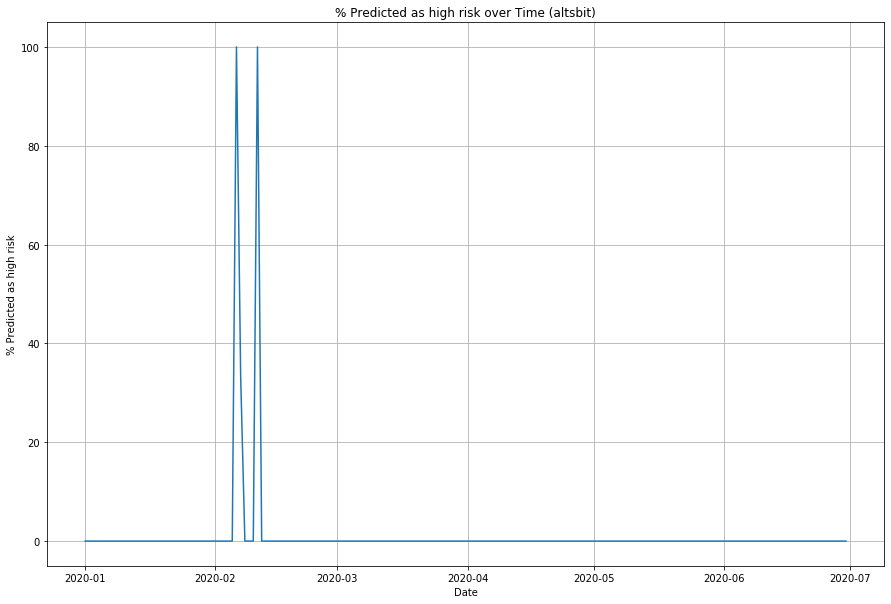

In [61]:
perc_hack_graph(df, all_unfil, '2020-01-01', '2020-06-30', 'altsbit')


2020-02-06 - corresponds with Altsbit hack

2020-02-11 - Altsbit annouces shut down


In [88]:
data = get_data_on_date(df, datetime(2020,2,11).date(), 'altsbit')
view = data[data['pred']==1]
view

,date_time,text,entity,pred,date
5212,2020-02-11 20:46:09,hacked crypto exchange altsbit announces shut ...,altsbit,1,2020-02-11
5213,2020-02-11 20:45:35,hacked crypto exchange altsbit announces shut ...,altsbit,1,2020-02-11
5214,2020-02-11 02:49:56,altsbit crypto exchange to shut down following...,altsbit,1,2020-02-11
5215,2020-02-11 02:49:41,altsbit crypto exchange to shut down following...,altsbit,1,2020-02-11
5216,2020-02-11 02:37:43,hack losses sees new crypto exchange altsbit s...,altsbit,1,2020-02-11
5217,2020-02-11 02:34:37,hack losses sees new crypto exchange altsbit s...,altsbit,1,2020-02-11
5218,2020-02-11 02:32:42,hack losses sees new crypto exchange altsbit s...,altsbit,1,2020-02-11


##### Coincheck

                  perc
2020-03-12   66.666667
2020-03-15  100.000000
2020-04-02  100.000000
2020-04-12  100.000000
2020-06-04   83.333333
2020-06-08  100.000000
2020-06-29  100.000000


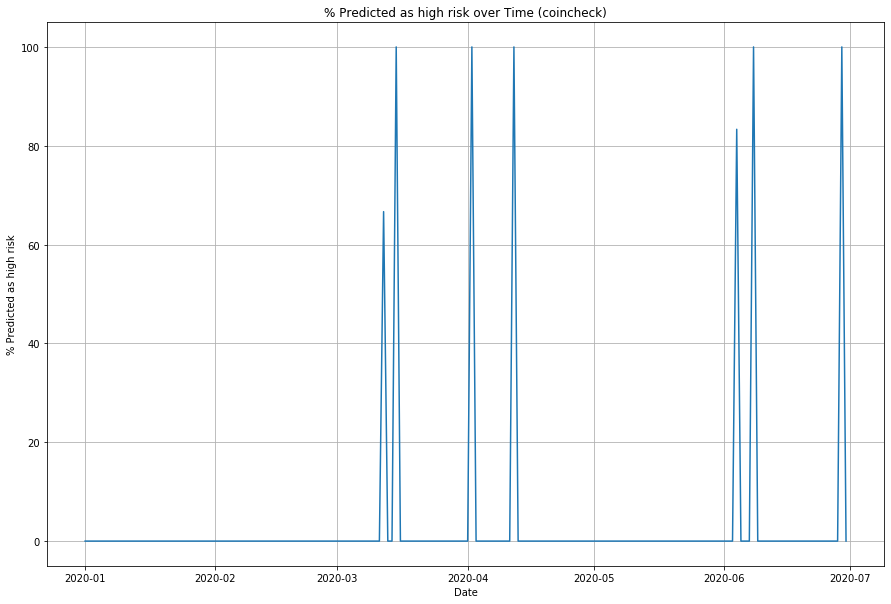

In [89]:
perc_hack_graph(df, all_unfil, '2020-01-01', '2020-06-30', 'coincheck')


2020-03-12  - Past hack: arrest of hackers

2020-03-15  - Past hack: Stolen NEM From Coincheck in 2018 is Still Available...	)

2020-04-02 - Past hack: Prosecutors charge 2 men ober coincheck hack	)

2020-04-12 - false +ve

2020-06-04 - data breach

2020-06-08 - false +ve

2020-06-29 - summary of hacks

In [98]:
data = get_data_on_date(df, datetime(2020,6,8).date(), 'coincheck')
view = data[data['pred']==1]
view

,date_time,text,entity,pred,date
5228,2020-06-08 20:21:11,japanese crypto exchange coincheck reports dat...,coincheck,1,2020-06-08
5229,2020-06-08 20:20:59,japanese crypto exchange coincheck reports dat...,coincheck,1,2020-06-08
5230,2020-06-08 20:20:48,japanese crypto exchange coincheck reports dat...,coincheck,1,2020-06-08


##### Fcoin

                  perc
2020-02-18   43.750000
2020-02-19   11.111111
2020-02-21  100.000000
2020-02-23   80.000000
2020-06-12   50.000000


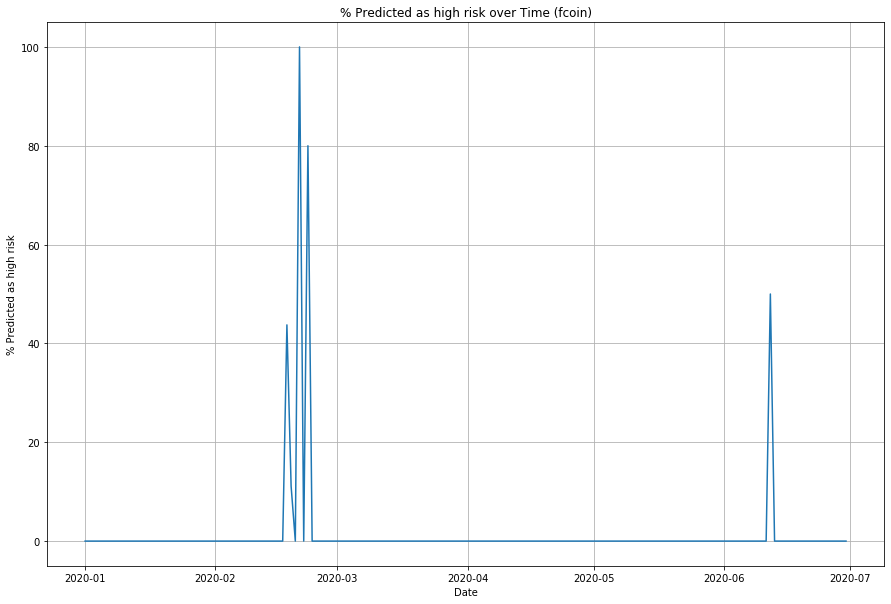

In [60]:
perc_hack_graph(df, all_unfil, '2020-01-01', '2020-06-30', 'fcoin')


2020-02-18: fcoin shuts down; owes users around $125 million 

2020-06-12: Past article related to above shut down

##### Bitfinex

                 perc
2020-02-18  92.391304
2020-02-28  36.363636
2020-02-29  12.500000
2020-04-17  14.285714
2020-05-03  14.285714
2020-05-21  95.505618
2020-05-22  15.789474
2020-06-12  30.000000


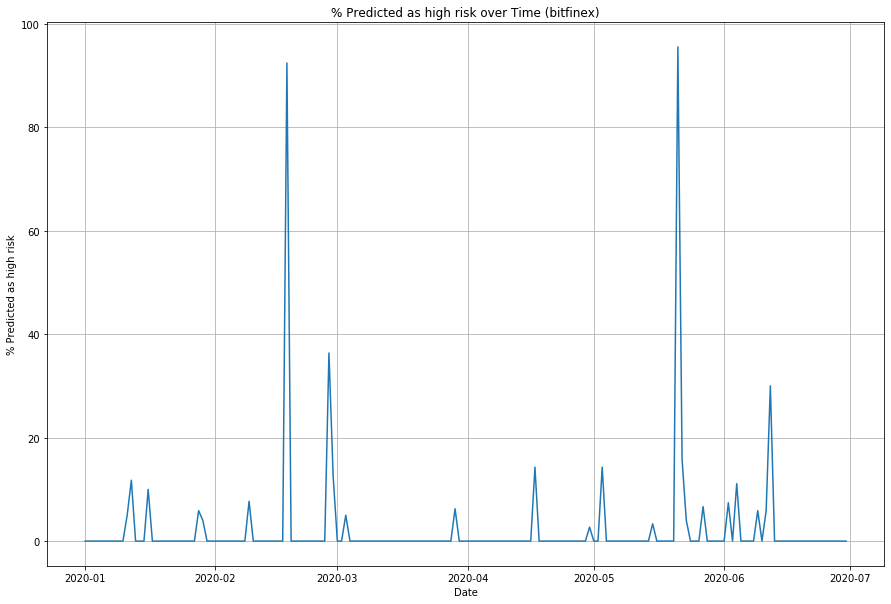

In [64]:
perc_hack_graph(df, all_unfil, '2020-01-01', '2020-06-30','bitfinex')


2020-02-18 - false +ve

2020-02-28 - bitfinex hit by ddos

2020-04-17 - false +ve due to small volume of data

2020-05-03 -  false +ve due to small volume of data

2020-05-21 - summary of hacks (bitfinex mentioned)

2020-05-22 - previous bitfinex hacked funds on the move

2020-06-12 - previous bitfinex hacked funds on the move

##### Binance

                perc
2020-01-12  4.166667
2020-01-18  4.225352
2020-03-11  5.555556
2020-04-07  3.773585
2020-04-09  6.756757
2020-04-10  3.649635
2020-04-16  5.555556
2020-04-29  4.477612


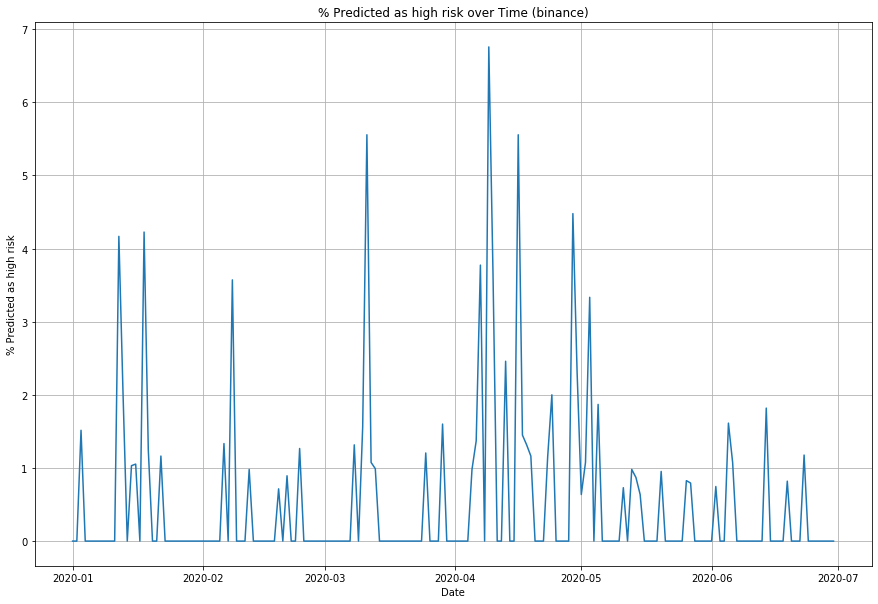

In [72]:
perc_hack_graph(df, all_unfil, '2020-01-01', '2020-06-30','binance')


2020-01-12 - false +ve (only 1 labelled high risk)

2020-01-18 - false +ve? (Bitcoin fund manager has Binance account hacked)

2020-03-11 - Binance Users in Turkey May Have Been Compromised, Many Receive Phishing SMS Messages

2020-04-07 - Binance Accused of Stealing $1 Million Worth of Assets: Company Denies Everything but Class Action Underway

2020-04-09 - False +ve (Statement by Binance: Binance denies theft of 3.995 Ethereum and 429...	)

2020-04-10 - False +ve (Statement by Binance: Binance denies theft...	)

2020-04-16 - Subjective comments on reddit 

2020-04-29 - Binance ddos attack

In [83]:
data = get_data_on_date(df, datetime(2020,4,16).date(), 'binance')
view = data[data['pred']==1]
view

,date_time,text,entity,pred,date
161,2020-04-16 18:00:43,binance was hacked and sadly corrupt,binance,1,2020-04-16
162,2020-04-16 14:05:42,binance might have been hacked,binance,1,2020-04-16
163,2020-04-16 09:39:57,binance accused of stealing $1 million worth o...,binance,1,2020-04-16
490,2020-04-16 19:57:05,lol also in other news binance accused of stea...,binance,1,2020-04-16


##### Bancor

                 perc
2020-06-18  25.531915
2020-06-19   4.000000
2020-06-22   5.000000


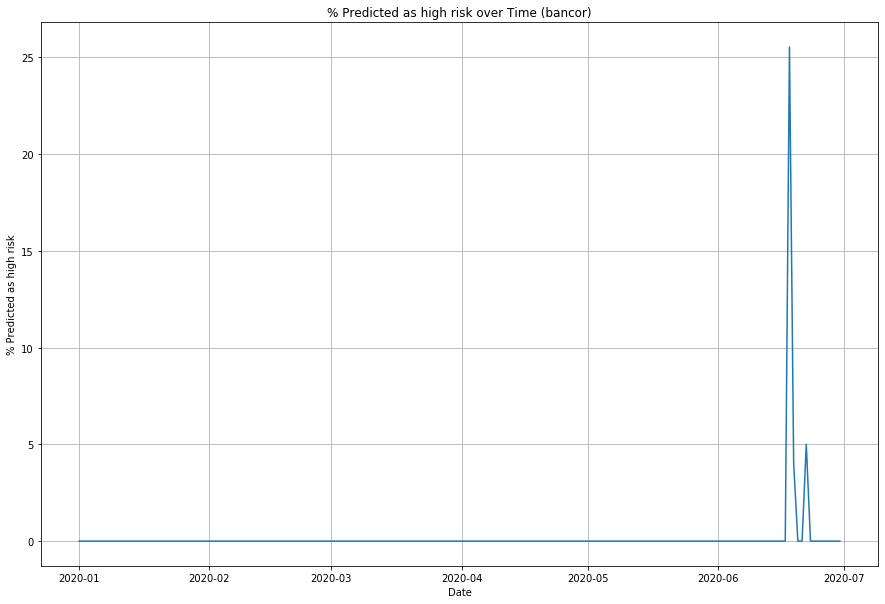

In [85]:
perc_hack_graph(df, all_unfil, '2020-01-01', '2020-06-30','bancor')


2020-06-18 - bancor discovers critical vulnerability, hacks itself to prevent theft

2020-06-19 - ^

2020-06-22 - ^

##### Blockfi

                 perc
2020-05-19  10.714286
2020-05-20   7.339450
2020-05-21  81.028939
2020-05-22   3.225806
2020-05-30   4.545455
2020-06-02   3.030303
2020-06-05   7.692308
2020-06-07   5.263158


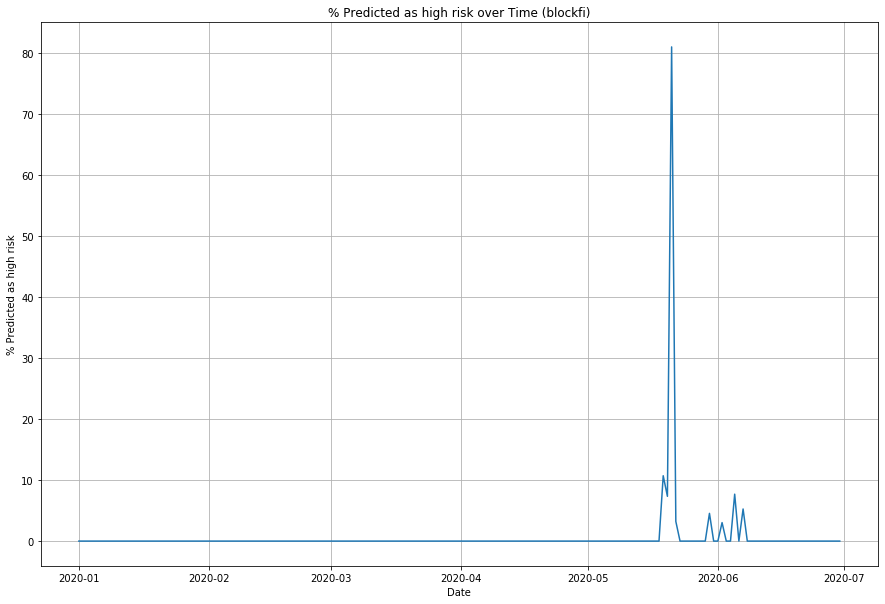

In [84]:
perc_hack_graph(df, all_unfil, '2020-01-01', '2020-06-30','blockfi')


2020-05-19 - blockfi attacked, attacker had access to private data

2020-05-20 - ^

2020-05-21 - ^

Other dates with smaller peaks: (1 comment on social media being captured as high risk)